In [21]:
# Telco Customer Churn - Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [23]:
#  info
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   ob

In [24]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan))
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [27]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


No     5174
Yes    1869
Name: Churn, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

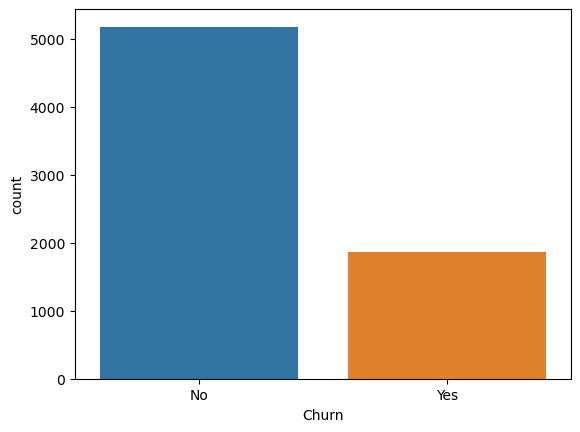

In [28]:
print(df['Churn'].value_counts())
sns.countplot(data=df, x='Churn')

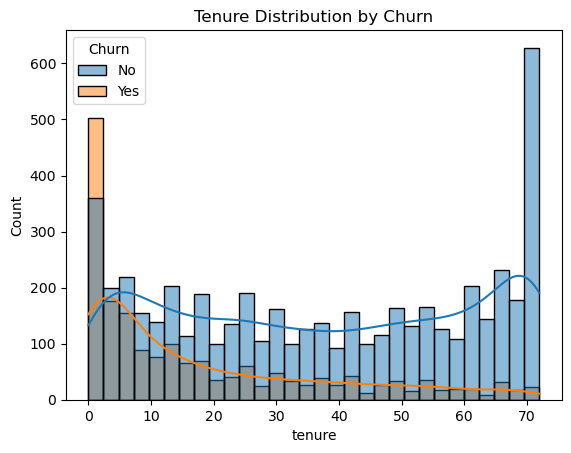

In [29]:
# Visualizing tenure distribution
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()

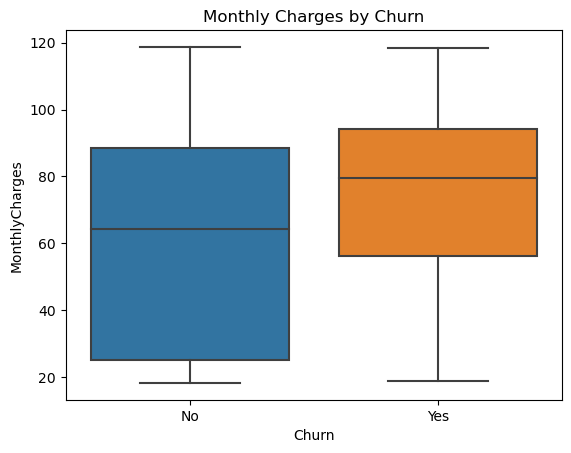

In [30]:
# Boxplot for MonthlyCharges by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

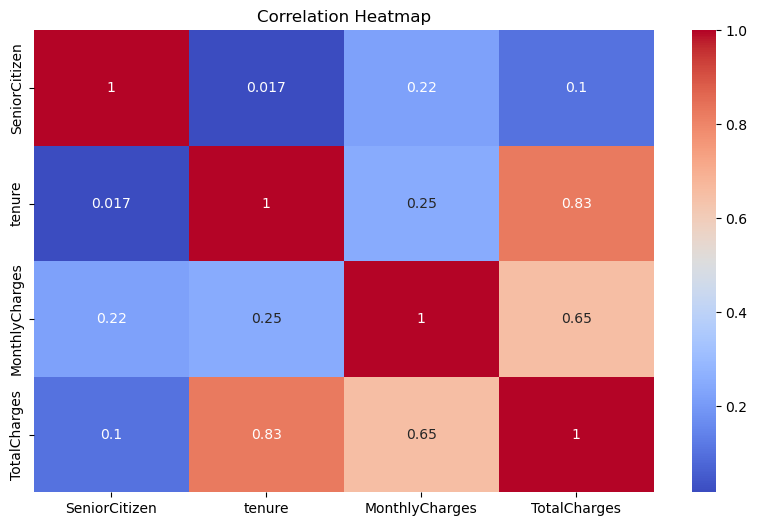

In [31]:
# Heatmap of numerical feature correlations
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

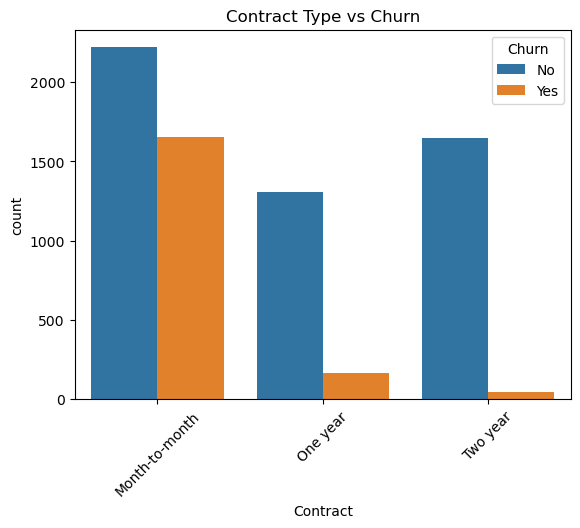

In [32]:
# Barplot for Contract Type vs Churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)
plt.show()

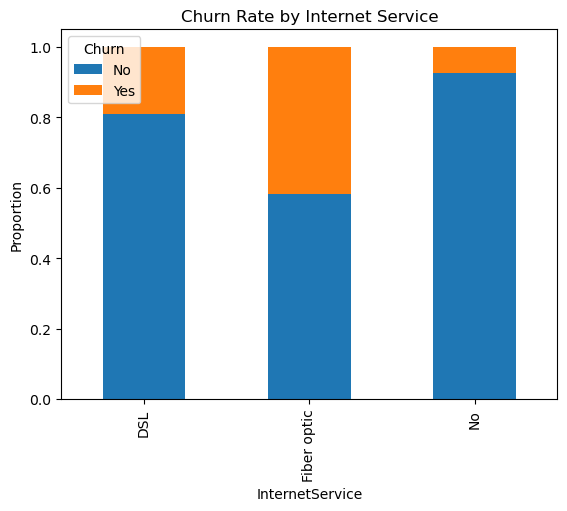

In [33]:
# Churn rate by Internet Service
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
internet_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Proportion')
plt.show()


In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Data preprocessing
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})  # Encoding target variable
df = pd.get_dummies(df, drop_first=True)  # One-Hot Encoding for categorical variables

# Splitting the data
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable (Churn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1539
           1       0.72      0.45      0.55       574

    accuracy                           0.80      2113
   macro avg       0.77      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113

Confusion Matrix:
[[1440   99]
 [ 316  258]]


In [ ]:
""""Metrics:
Precision: The proportion of positive predictions (churned customers) that are actually correct.

Precision for Class 0 (Not Churned): 0.82 → 82% of customers predicted to not churn actually did not churn.

Precision for Class 1 (Churned): 0.72 → 72% of customers predicted to churn actually did churn.

Recall: The proportion of actual positives (actual churned customers) that were correctly identified.

Recall for Class 0 (Not Churned): 0.94 → 94% of actual non-churned customers were correctly predicted as not churned.

Recall for Class 1 (Churned): 0.45 → 45% of actual churned customers were correctly predicted as churned. This suggests the model is missing many churned customers (low recall for churn).

F1-Score: The harmonic mean of precision and recall. This metric balances precision and recall, and is important when you have imbalanced classes.

F1-score for Class 0 (Not Churned): 0.87

F1-score for Class 1 (Churned): 0.55

Weighted average F1-score: 0.79 → A reasonable overall performance but indicates room for improvement in predicting churned customers.

Support: The number of actual occurrences of each class in the dataset.

Support for Class 0 (Not Churned): 1539 (larger class)

Support for Class 1 (Churned): 574 (smaller class)"""